In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Importing Data

In [2]:
# Food Data 

df_food = pd.read_csv('../Data/df_food.csv')

df_food.head()

,Date,Location,Products,Price
0,2017-01-01,Alberta,"Almonds, 200 grams",3.84
1,2017-01-01,Alberta,"Apple juice, 2 litres",2.90
2,2017-01-01,Alberta,"Apples, per kilogram",3.86
3,2017-01-01,Alberta,"Avocado, unit",1.56
4,2017-01-01,Alberta,"Baby food, 128 millilitres",1.19


In [4]:
# Import Data

df_import = pd.read_csv('../Data/df_import.csv')

df_import.head()

,Date,Location,Category,Dollar Value ('000s')
0,2017-01-01,Canada,Live animals or animal products,259695
1,2017-02-01,Canada,Live animals or animal products,233977
2,2017-03-01,Canada,Live animals or animal products,274930
3,2017-04-01,Canada,Live animals or animal products,268410
4,2017-05-01,Canada,Live animals or animal products,287065


In [3]:
# Unemployment - basic

df_empl = pd.read_csv('../Data/df_empl.csv')

df_empl.head()

,Date,Location,Unemp_Rate
0,2017-01-01,Canada,6.8
1,2017-02-01,Canada,6.6
2,2017-03-01,Canada,6.7
3,2017-04-01,Canada,6.5
4,2017-05-01,Canada,6.6


In [6]:
# Unemployment - by Sector

df_sector = pd.read_csv('../Data/df_sector.csv')

df_sector.head()

,Date,Location,Sector,Unemployment Rate
0,2017-01,Canada,"Total, all industries",7.2
1,2017-02,Canada,"Total, all industries",7.0
2,2017-03,Canada,"Total, all industries",7.2
3,2017-04,Canada,"Total, all industries",6.8
4,2017-05,Canada,"Total, all industries",6.6


In [9]:
def convert_to_datetime(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [11]:
df_food = convert_to_datetime(df_food)

df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95460 entries, 0 to 95459
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      95460 non-null  datetime64[ns]
 1   Location  95460 non-null  object        
 2   Products  95460 non-null  object        
 3   Price     95460 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.9+ MB


In [12]:
df_import = convert_to_datetime(df_import)
df_empl = convert_to_datetime(df_empl)
df_sector = convert_to_datetime(df_sector)

In [28]:
df_import['Category'].unique()

array(['Live animals or animal products', 'Vegetable products',
       'Animal or vegetable oils', 'Processed food and beverages'],
      dtype=object)

In [31]:
# Meats and Alternatives
animal_products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg',
                  'Bacon, 500 grams', 'Wieners, 400 grams', 'Salmon, per kilogram',
                  'Shrimp, 300 grams', 'Canned salmon, 213 grams',
                  'Canned tuna, 170 grams', 'Meatless burgers, 226 grams',
                  'Milk, 1 litre', 'Milk, 2 litres', 'Milk, 4 litres',
                  'Butter, 454 grams', 'Cream, 1 litre', 'Block cheese, 500 grams', 
                  'Yogurt, 500 grams', 'Eggs, 1 dozen']

# Dairy

vegetable_products = ['Apples, per kilogram', 'Oranges, per kilogram',
       'Oranges, 1.36 kilograms', 'Bananas, per kilogram',
       'Pears, per kilogram', 'Lemons, unit', 'Limes, unit',
       'Grapes, per kilogram', 'Cantaloupe, unit',
       'Strawberries, 454 grams', 'Avocado, unit',
       'Potatoes, 4.54 kilograms', 'Potatoes, per kilogram',
       'Sweet potatoes, per kilogram', 'Tomatoes, per kilogram',
       'Cabbage, per kilogram', 'Carrots, 1.36 kilograms',
       'Onions, per kilogram', 'Onions, 1.36 kilograms', 'Celery, unit',
       'Cucumber, unit', 'Mushrooms, 227 grams', 'Iceberg lettuce, unit',
       'Romaine lettuce, unit', 'Broccoli, unit', 'Peppers, per kilogram',
       'Squash, per kilogram', 'Salad greens, 142 grams',
       'Frozen french fried potatoes, 750 grams',
       'Frozen green beans, 750 grams', 'Frozen broccoli, 500 grams',
       'Frozen corn, 750 grams ', 'Frozen mixed vegetables, 750 grams ',
       'Frozen peas, 750 grams', 'Frozen spinach, 300 grams', 
       'Frozen strawberries, 600 grams', 'Soy milk, 1.89 litres', 
       'Nut milk, 1.89 litres', 'Margarine, 907 grams']

oil_products = ['Vegetable oil, 3 litres',
       'Canola oil, 3 litres', 'Olive oil, 1 litre']

processed_products = ['Frozen pizza, 390 grams', 'White bread, 675 grams', 
                'Flatbread and pita, 500 grams ','Crackers and crisp breads, 200 grams ',
                'Dry or fresh pasta, 500 grams', 'Brown rice, 900 grams ',
                'White rice, 2 kilograms', 'Wheat flour, 2.5 kilograms', 
                'Cereal, 400 grams', 'White sugar, 2 kilograms',
                'Apple juice, 2 litres', 'Orange juice, 2 litres',
                'Roasted or ground coffee, 340 grams', 'Tea (20 bags)',
                'Ketchup, 1 litre', 'Baby food, 128 millilitres', 
                'Infant formula, 900 grams ', 'Peanut butter, 1 kilogram', 
                'Mayonnaise, 890 millilitres ', 'Cookies and sweet biscuits, 300 grams ', 
                'Hummus, 227 grams', 'Salsa, 418 millilitres',
                'Pasta sauce, 650 millilitres', 'Salad dressing, 475 millilitres',
                'Almonds, 200 grams', 'Peanuts, 450 grams','Sunflower seeds, 400 grams ',
                'Canned baked beans, 398 millilitres',
                'Canned tomatoes, 796 millilitres', 'Canned soup, 284 millilitres',
                'Canned beans and lentils, 540 millilitres',
                'Canned corn, 341 millilitres', 'Canned peach, 398 millilitres',
                'Canned pear, 398 millilitres', 'Dried lentils, 900 grams',
                'Dry beans and legumes, 900 grams ']

household_products = ['Deodorant, 85 grams',
       'Toothpaste, 100 millilitres', 'Shampoo, 400 millilitres',
       'Laundry detergent, 4.43 litres']

# Visualizations

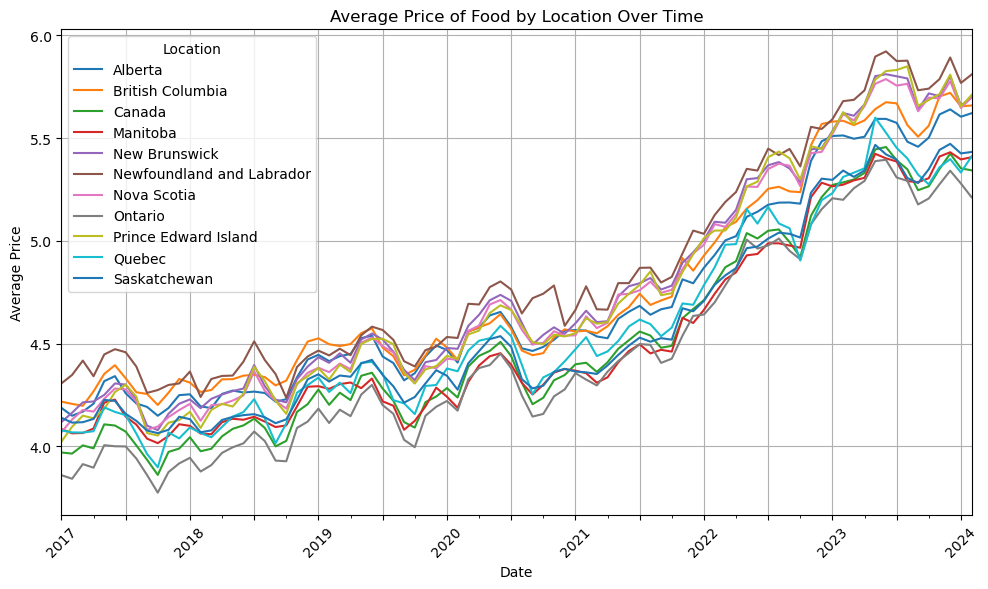

In [13]:
# Group the data by Date and Location and calculate the mean price
grouped_data = df_food.groupby(['Date', 'Location'])['Price'].mean().unstack()


grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Price of Food by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Location', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# Using plotly

grouped_data = df_food.groupby(['Date', 'Location'])['Price'].mean().unstack().reset_index()

# Create a line plot using Plotly
fig = px.line(grouped_data, x='Date', y=grouped_data.columns[1:], title='Average Price of Food by Location Over Time')

# Update layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Price',
    legend_title='Location',
    xaxis=dict(
        tickmode='linear',
        tick0=grouped_data['Date'].min(),
        dtick='M6',
        tickformat='%Y-%m'
    ),
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Show the plot
fig.show()

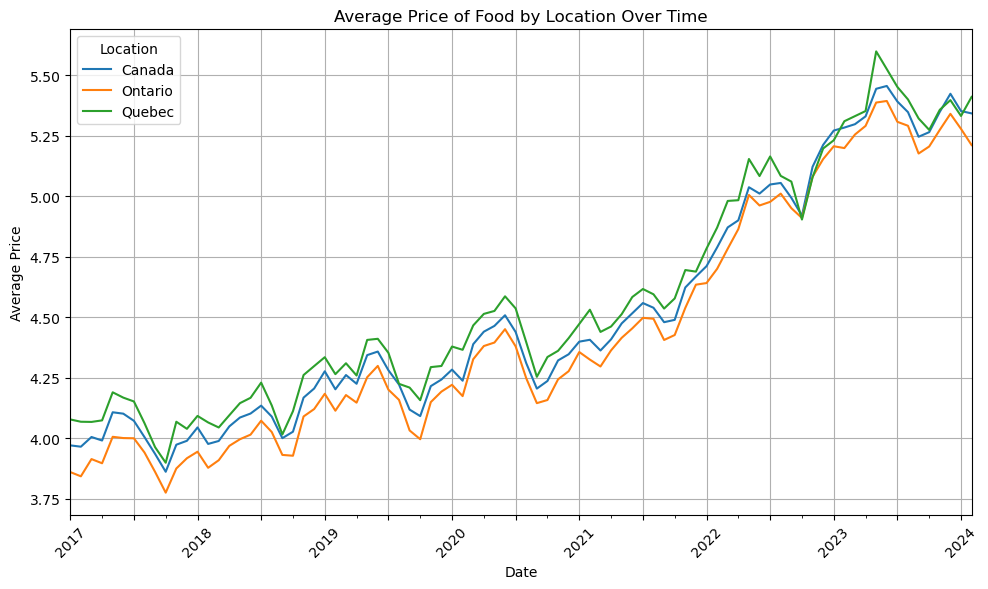

In [15]:
# Include only specified locations

# List of locations to include
locations = ['Canada', 'Quebec', 'Ontario']

filtered_data = df_food[df_food['Location'].isin(locations)]

grouped_data = filtered_data.groupby(['Date', 'Location'])['Price'].mean().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Price of Food by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Location', loc='upper left')
#plt.xticks(rotation=45)
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Meats and Alternatives
meat_items = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg',
                  'Bacon, 500 grams', 'Wieners, 400 grams', 'Salmon, per kilogram',
                  'Shrimp, 300 grams', 'Canned salmon, 213 grams',
                  'Canned tuna, 170 grams', 'Meatless burgers, 226 grams', 'Tofu, 350 grams ']

# Dairy

dairy_items = ['Milk, 1 litre', 'Milk, 2 litres', 'Milk, 4 litres',
       'Soy milk, 1.89 litres', 'Nut milk, 1.89 litres', 'Cream, 1 litre',
       'Butter, 454 grams', 'Margarine, 907 grams',
       'Block cheese, 500 grams', 'Yogurt, 500 grams', 'Eggs, 1 dozen']


#Frozen

frozen_items = ['Frozen french fried potatoes, 750 grams',
       'Frozen green beans, 750 grams', 'Frozen broccoli, 500 grams',
       'Frozen corn, 750 grams ', 'Frozen mixed vegetables, 750 grams ',
       'Frozen peas, 750 grams', 'Frozen pizza, 390 grams',
       'Frozen spinach, 300 grams', 'Frozen strawberries, 600 grams']

# Fruits and Vegetables

veggie_items = ['Apples, per kilogram', 'Oranges, per kilogram',
       'Oranges, 1.36 kilograms', 'Bananas, per kilogram',
       'Pears, per kilogram', 'Lemons, unit', 'Limes, unit',
       'Grapes, per kilogram', 'Cantaloupe, unit',
       'Strawberries, 454 grams', 'Avocado, unit',
       'Potatoes, 4.54 kilograms', 'Potatoes, per kilogram',
       'Sweet potatoes, per kilogram', 'Tomatoes, per kilogram',
       'Cabbage, per kilogram', 'Carrots, 1.36 kilograms',
       'Onions, per kilogram', 'Onions, 1.36 kilograms', 'Celery, unit',
       'Cucumber, unit', 'Mushrooms, 227 grams', 'Iceberg lettuce, unit',
       'Romaine lettuce, unit', 'Broccoli, unit', 'Peppers, per kilogram',
       'Squash, per kilogram', 'Salad greens, 142 grams']

# Grains

grain_items = ['White bread, 675 grams', 'Flatbread and pita, 500 grams ',
       'Crackers and crisp breads, 200 grams ',
       'Dry or fresh pasta, 500 grams', 'Brown rice, 900 grams ',
       'White rice, 2 kilograms', 'Wheat flour, 2.5 kilograms']

# Pantry Items

pantry_items = ['Cereal, 400 grams', 'White sugar, 2 kilograms',
       'Apple juice, 2 litres', 'Orange juice, 2 litres',
       'Roasted or ground coffee, 340 grams', 'Tea (20 bags)',
       'Ketchup, 1 litre', 'Vegetable oil, 3 litres',
       'Canola oil, 3 litres', 'Olive oil, 1 litre',
       'Baby food, 128 millilitres', 'Infant formula, 900 grams ',
       'Peanut butter, 1 kilogram', 'Mayonnaise, 890 millilitres ',
       'Cookies and sweet biscuits, 300 grams ', 'Hummus, 227 grams', 'Salsa, 418 millilitres',
       'Pasta sauce, 650 millilitres', 'Salad dressing, 475 millilitres',
       'Almonds, 200 grams', 'Peanuts, 450 grams',
       'Sunflower seeds, 400 grams ']

# Shelf Stable Goods

shelf_items = ['Canned baked beans, 398 millilitres',
       'Canned tomatoes, 796 millilitres', 'Canned soup, 284 millilitres',
       'Canned beans and lentils, 540 millilitres',
       'Canned corn, 341 millilitres', 'Canned peach, 398 millilitres',
       'Canned pear, 398 millilitres', 'Dried lentils, 900 grams',
       'Dry beans and legumes, 900 grams ']

# Household

household_items = ['Deodorant, 85 grams',
       'Toothpaste, 100 millilitres', 'Shampoo, 400 millilitres',
       'Laundry detergent, 4.43 litres']

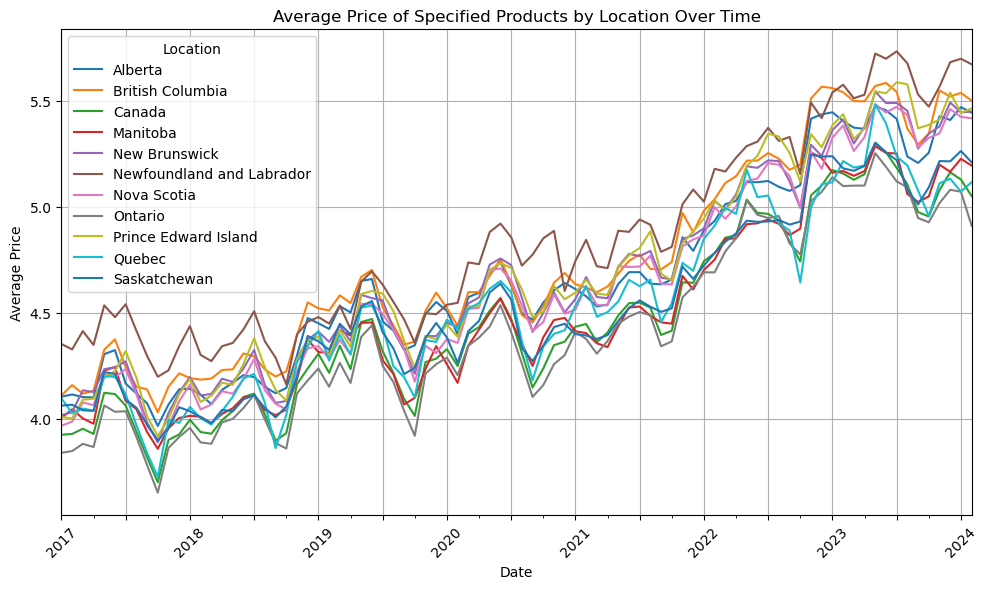

In [33]:
food = vegetable_products + animal_products


filtered_data = df_food[df_food['Products'].isin(food)]


grouped_data = filtered_data.groupby(['Date', 'Location'])['Price'].mean().unstack()


grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Price of Specified Products by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Location', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

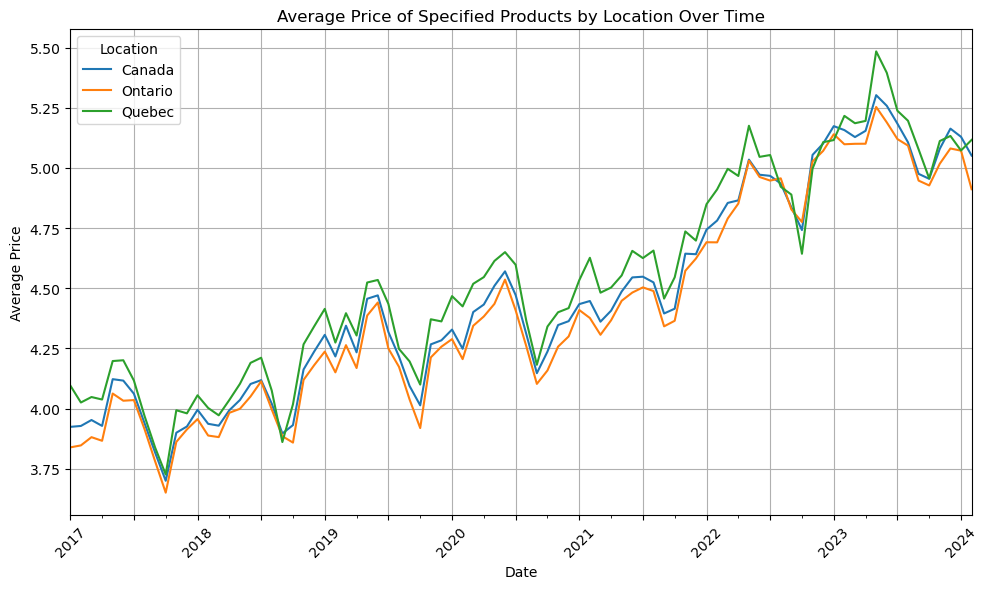

In [34]:
locations = ['Canada', 'Quebec', 'Ontario']
food = vegetable_products + animal_products

filtered_data = df_food[df_food['Location'].isin(locations) & df_food['Products'].isin(food)]


grouped_data = filtered_data.groupby(['Date', 'Location'])['Price'].mean().unstack()


grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Price of Specified Products by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Location', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

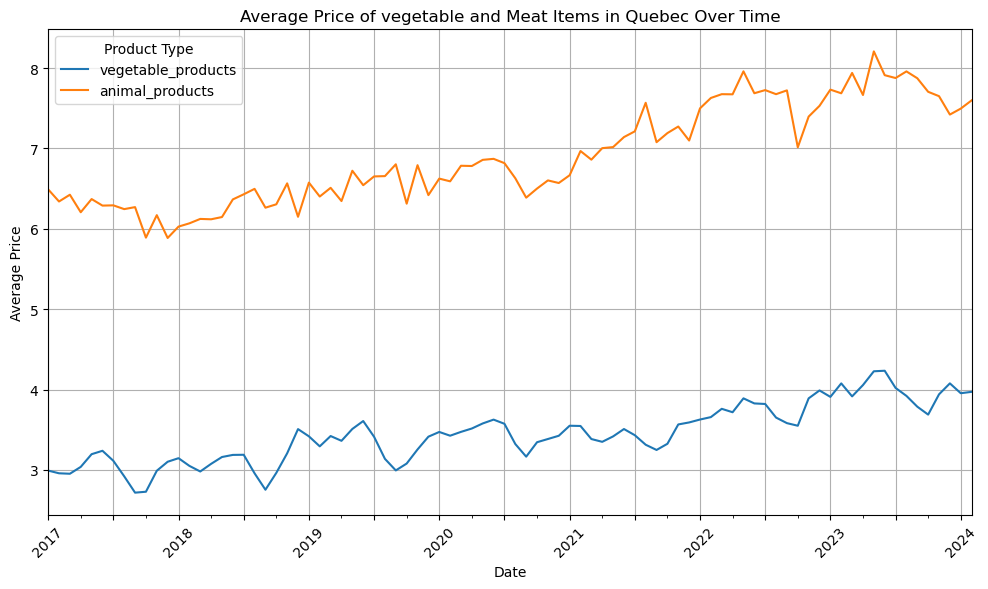

In [37]:
# Plot specified items by one location, multiple products

location = 'Quebec'

food = vegetable_products + animal_products

filtered_data = df_food[(df_food['Location'] == location) & df_food['Products'].isin(food)]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot vegetables
vegetable_data = filtered_data[filtered_data['Products'].isin(vegetable_products)]
vegetable_data.groupby('Date')['Price'].mean().plot(ax=ax, label='vegetable_products')

# Plot meat items
animal_data = filtered_data[filtered_data['Products'].isin(animal_products)]
animal_data.groupby('Date')['Price'].mean().plot(ax=ax, label='animal_products')

plt.title(f'Average Price of vegetable and Meat Items in {location} Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Product Type', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

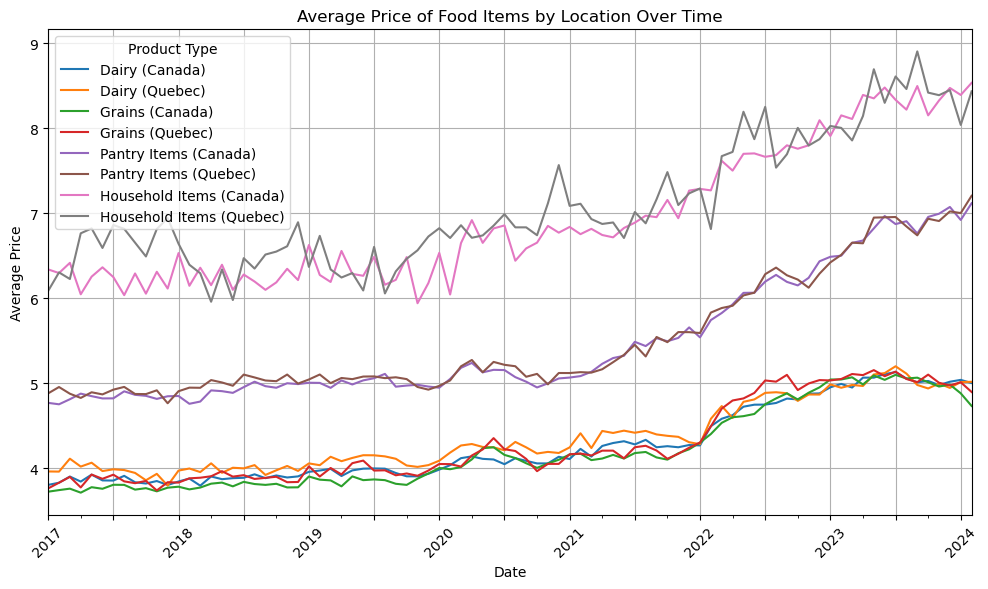

In [20]:
# Multiple Products, multiple locations

# Define the dictionary
food_categories = {
    'Dairy': dairy_items,
    #'Meat': meat_items,
    #'Frozen': frozen_items,
    #'Fruits and Vegetables': veggie_items,
    'Grains': grain_items,
    'Pantry Items': pantry_items,
    #'Shelf Items': shelf_items,
    'Household Items': household_items
}

locations = ['Canada', 'Quebec']

# Filter the DataFrame
filtered_data = df_food[df_food['Location'].isin(locations)]

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each food category
for category, items in food_categories.items():
    # Loop over each location
    for location in locations:
        # Filter the data for the current location and category
        location_data = filtered_data[(filtered_data['Location'] == location) & 
                                      (filtered_data['Products'].isin(items))]
        
        # Plot data for the current location and category
        location_data.groupby('Date')['Price'].mean().plot(ax=ax, label=f'{category} ({location})')

plt.title('Average Price of Food Items by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Product Type', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

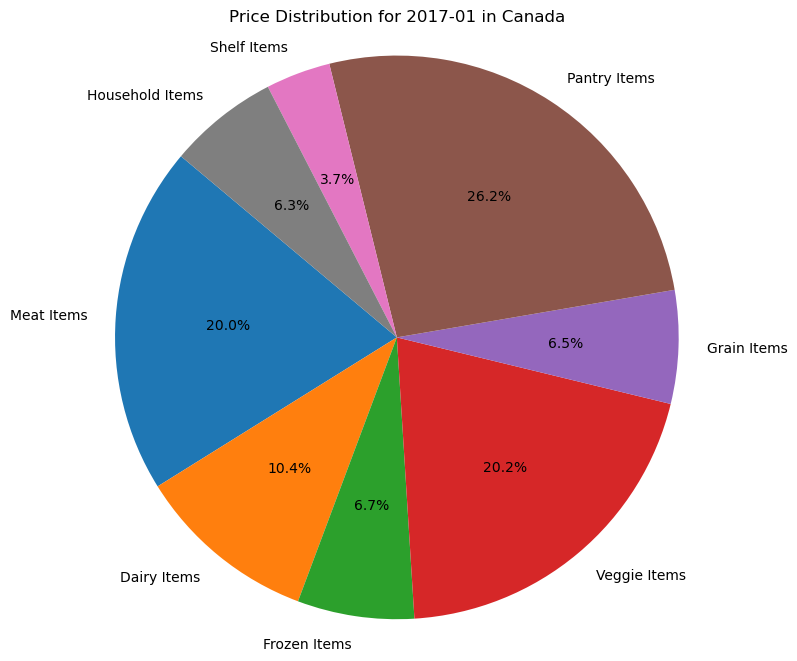

In [21]:
# Chose the Location and Month
geo = 'Canada'
date = '2017-01'

food_items_lists = [
    ('Meat Items', meat_items),
    ('Dairy Items', dairy_items),
    ('Frozen Items', frozen_items),
    ('Veggie Items', veggie_items),
    ('Grain Items', grain_items),
    ('Pantry Items', pantry_items),
    ('Shelf Items', shelf_items),
    ('Household Items', household_items)
]

# Initialize a dictionary to store the sum of prices for each food item list
total_prices = {}

# Calculate the sum of prices for each food item list
for list_name, items_list in food_items_lists:
    total_price = df_food[(df_food['Location'] == geo) & (df_food['Date'] == date) & (df_food['Products'].isin(items_list))]['Price'].sum()
    # Set the label to be the name of the list
    total_prices[list_name] = total_price

plt.figure(figsize=(8, 8))
plt.pie(total_prices.values(), labels=total_prices.keys(), autopct='%1.1f%%', startangle=140)
plt.title(f'Price Distribution for {date} in {geo}')
plt.axis('equal')
plt.show()


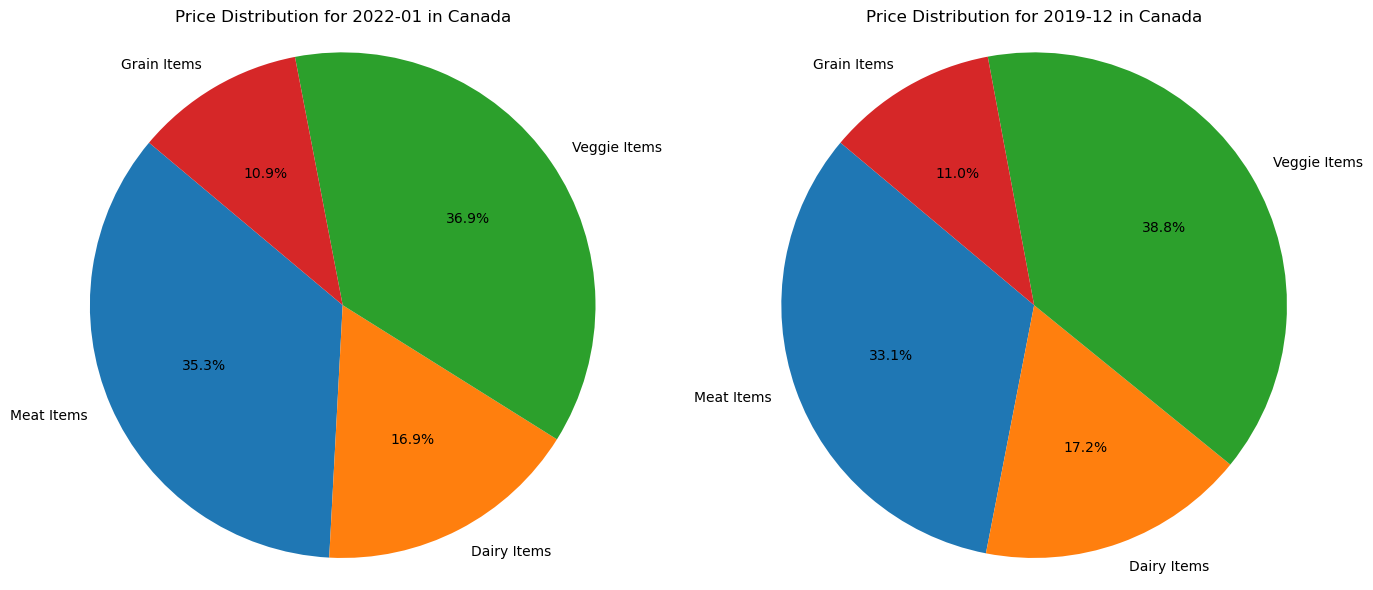

In [22]:
# Chose the desired Location and Dates
geo = 'Canada'
date1 = '2022-01'
date2 = '2019-12'

food_items_lists = [
    ('Meat Items', meat_items),
    ('Dairy Items', dairy_items),
    #('Frozen Items', frozen_items),
    ('Veggie Items', veggie_items),
    ('Grain Items', grain_items),
    #('Pantry Items', pantry_items),
    #('Shelf Items', shelf_items),
    #('Household Items', household_items)
]

# Initialize dictionaries to store the sum of prices for each food item list for each date
total_prices_date1 = {}
total_prices_date2 = {}

# Calculate the sum of prices for each food item list for each date
for list_name, items_list in food_items_lists:
    total_price_date1 = df_food[(df_food['Location'] == geo) & (df_food['Date'] == date1) & (df_food['Products'].isin(items_list))]['Price'].sum()
    total_price_date2 = df_food[(df_food['Location'] == geo) & (df_food['Date'] == date2) & (df_food['Products'].isin(items_list))]['Price'].sum()
    # Set the label to be the name of the list
    total_prices_date1[list_name] = total_price_date1
    total_prices_date2[list_name] = total_price_date2

# Create subplots with two pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Create pie chart for date1
axs[0].pie(total_prices_date1.values(), labels=total_prices_date1.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title(f'Price Distribution for {date1} in {geo}')
axs[0].axis('equal')

# Create pie chart for date2
axs[1].pie(total_prices_date2.values(), labels=total_prices_date2.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title(f'Price Distribution for {date2} in {geo}')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

In [38]:
# Chose the location, products, and dates
location = 'Canada'
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']
date1 = '2019-06'
date2 = '2023-02'

def get_prices_sum(products, location, date1, date2):
    # Filter the DataFrame to include only the specified products, location, and dates
    filtered_data = df_food[(df_food['Products'].isin(products)) & 
                            (df_food['Location'] == location) & 
                            ((df_food['Date'] == date1) | (df_food['Date'] == date2))]
    
    # Group the filtered data by 'Date' and sum the prices for all products
    grouped_data = filtered_data.groupby('Date')['Price'].sum()
    
    # Extract sum of prices for the two specified dates
    price_sum_date1 = round(grouped_data.loc[date1], 2)
    price_sum_date2 = round(grouped_data.loc[date2], 2)
    
    # Print statements
    print("Location:", location)
    print("Sum of prices for", date1 + ":", price_sum_date1.item())
    print("Sum of prices for", date2 + ":", price_sum_date2.item())

# Example usage
get_prices_sum(products, location, date1, date2)

Location: Canada
Sum of prices for 2019-06: 32.39
Sum of prices for 2023-02: 37.25


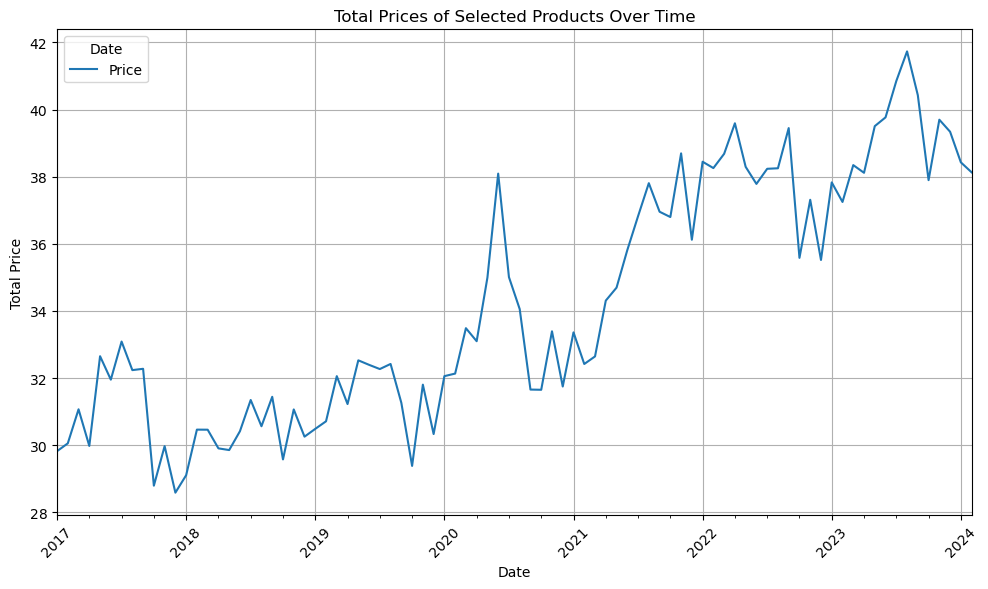

In [24]:
# Chose the location and products
location = 'Canada'
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']

def plot_prices_sum(products, location):
    # Filter the DataFrame to include only the specified products and location
    filtered_data = df_food[(df_food['Products'].isin(products)) & 
                            (df_food['Location'] == location)]
    
    # Group the filtered data by 'Date' and sum the prices for all products
    grouped_data = filtered_data.groupby('Date')['Price'].sum()
    
    # Plot the graph
    grouped_data.plot(kind='line', figsize=(10, 6))
    plt.title('Total Prices of Selected Products Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Price')
    plt.grid(True)
    plt.legend(title='Date', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_prices_sum(products, location)

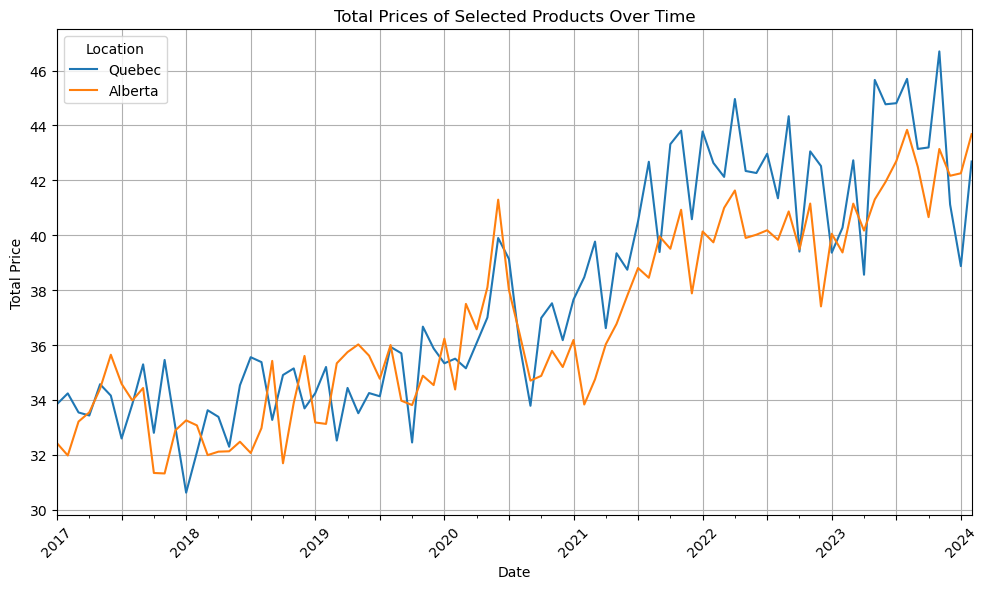

In [25]:
def plot_prices_sum(products, locations):
    # Iterate over each location
    for location in locations:
        # Filter the DataFrame to include only the specified products and location
        filtered_data = df_food[(df_food['Products'].isin(products)) & 
                                (df_food['Location'] == location)]
        
        # Group the filtered data by 'Date' and sum the prices for all products
        grouped_data = filtered_data.groupby('Date')['Price'].sum()
        
        # Plot the graph for the current location
        grouped_data.plot(kind='line', figsize=(10, 6), label=location)

    plt.title('Total Prices of Selected Products Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Price')
    plt.grid(True)
    plt.legend(title='Location', loc='upper left')
    plt.xticks(pd.date_range(start=grouped_data.index.min(), 
                             end=grouped_data.index.max(), freq='6MS'), rotation=45)
    plt.tight_layout()
    plt.show()

# Chose locations and products
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']
locations = ['Quebec', 'Alberta']

plot_prices_sum(products, locations)

In [26]:
def plot_prices_sum(products, locations):
    # Create an empty list to store traces (lines) for each location
    traces = []
    
    # Iterate over each location
    for location in locations:
        # Filter the DataFrame to include only the specified products and location
        filtered_data = df_food[(df_food['Products'].isin(products)) & 
                                (df_food['Location'] == location)]
        
        # Group the filtered data by 'Date' and sum the prices for all products
        grouped_data = filtered_data.groupby('Date')['Price'].sum()
        
        # Create a trace (line) for the current location
        trace = go.Scatter(x=grouped_data.index, y=grouped_data.values, mode='lines', name=location)
        traces.append(trace)

    # Specify layout options for the plot
    layout = go.Layout(title='Total Prices of Selected Products Over Time',
                       xaxis=dict(title='Date', tickangle=45),
                       yaxis=dict(title='Total Price'),
                       legend=dict(title='Location', orientation='h', x=0, y=1.1),
                       margin=dict(l=40, r=40, t=80, b=40),
                       hovermode='closest')

    # Plot the graph
    fig = go.Figure(data=traces, layout=layout)
    fig.show()

# Chose locations and products
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']
locations = ['Quebec', 'Alberta']

plot_prices_sum(products, locations)